<a href="https://colab.research.google.com/github/gundaminpde/2023-spring/blob/main/02_3_Preprocess_additional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ColumnTransformer를 이용한 전처리**

In [ ]:

import pandas as pd
import os

# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다

url = "https://raw.githubusercontent.com/gundaminpde/2023-spring/main/Dset_adult_data_set.csv"

data = pd.read_csv(
    url, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [ ]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


# **ColumnTransformer 사용하기**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), 
      ['workclass', 'education', 'gender', 'occupation'])])


In [ ]:
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다

data_features = data.drop("income", axis=1)
# 데이터프레임과 incom을 분할합니다.

X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_X_train_trans=pd.DataFrame(X_train_trans)
df_X_train_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.498941,-0.445097,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.380451,-1.668489,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250134,-0.037300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.925213,-0.037300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.543971,-0.037300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **make_column_transformer 사용하기**

In [ ]:
from sklearn.compose import make_column_transformer
mk_ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse_output=False), ['workclass', 'education', 'gender', 'occupation']))

mk_ct.fit(X_train)
X_train_mk_ct =mk_ct.transform(X_train)
print(X_train_mk_ct.shape)

df_X_train_mk_ct=pd.DataFrame(X_train_mk_ct)
df_X_train_mk_ct.head()

(24420, 44)


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.498941,-0.445097,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.380451,-1.668489,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250134,-0.037300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.925213,-0.037300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.543971,-0.037300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Univariate Nonlinear Transformations**

In [6]:
# Data set을 만들자.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [7]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


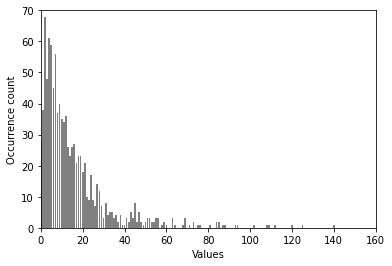

In [10]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Occurrence count")
plt.xlabel("Values")
plt.show() 

In [12]:
## Ridge regression으로 분석

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score)) ## 결과가 좋지 못하다.

테스트 점수: 0.622


 **log 함수를 적용하는 것이 포인트**

In [14]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

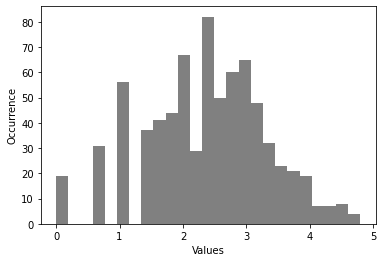

In [16]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Occurrence")
plt.xlabel("Values")
plt.show() 

In [17]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875
